In [1]:
import sys
import pandas as pd
import os
sys.path.append(os.path.abspath("../0_UTILITY_FUNCTIONS/"))
from get_data import *
from plotting import *
from get_LrLx_data import *

# Get Data

In [2]:
source_df, obs_df, radio_df, xray_df = read_data("../DATA/MAXI J1816-195.txt")

MAXI J1816-195
Added 5% systematic uncertainty to the radio data.
X-ray uncertainty percentage:  68
Added 10.0% systematic uncertainty to the X-ray data.


In [3]:
obs_df

,name,xray_CI,xray_obs_ref,radio_obs_ref,extra_xray_text,extra_radio_text
0,MAXI J1816-195,68,[Crook-Mansour et al. (in prep.) & ],[Crook-Mansour et al. (in prep) &],"A dust-scattering halo has been reported, whic...",NaN


In [4]:
source_df

,name,class,l_deg,b_deg,coordinates_refs,D,D_prob,distance_distribution_text,distance_refs
0,MAXI J1816-195,NS,11.605,-1.562,[],6.0,"(""uniform"",1,8.7)",1.0-8.7,[]


Note that the distance is very uncertain. 

In [5]:
radio_df.head()

,name,blockID,band,t_radio,dt_radio,Rphase,Rstate,Fr,Fr_unc,local_rms,alpha,alpha_unc,Fr_uplim_bool
0,MAXI J1816-195,1654729268,L,59738.97492,0.010366,NaN,HS,4.20600,0.212204,23.92,NaN,NaN,False
1,MAXI J1816-195,1655070377,L,59742.98707,0.010366,NaN,HS,0.07451,0.024837,24.84,NaN,NaN,True
2,MAXI J1816-195,1656880661,L,59763.92267,0.010366,NaN,HS,0.31920,0.030559,25.40,NaN,NaN,False
3,MAXI J1816-195,1657395077,L,59769.87550,0.010366,quiescence,QS,0.07679,0.025597,25.60,NaN,NaN,True
4,MAXI J1816-195,1657909279,L,59775.81249,0.010459,quiescence,QS,0.07090,0.023633,23.63,NaN,NaN,True


In [6]:
xray_df.head(4)

,name,obsID,t_xray,dt_xray,Xphase,Xstate,Fx,Fx_unc_l,Fx_unc_u,model,fit_stat,Fx_uplim_bool
0,MAXI J1816-195,15208001,59738.19882,0.143,NaN,HS,4.670000e-09,4.679793e-10,4.679600e-10,tbabs * pegpwrlw,cstat,False


# Light Curves

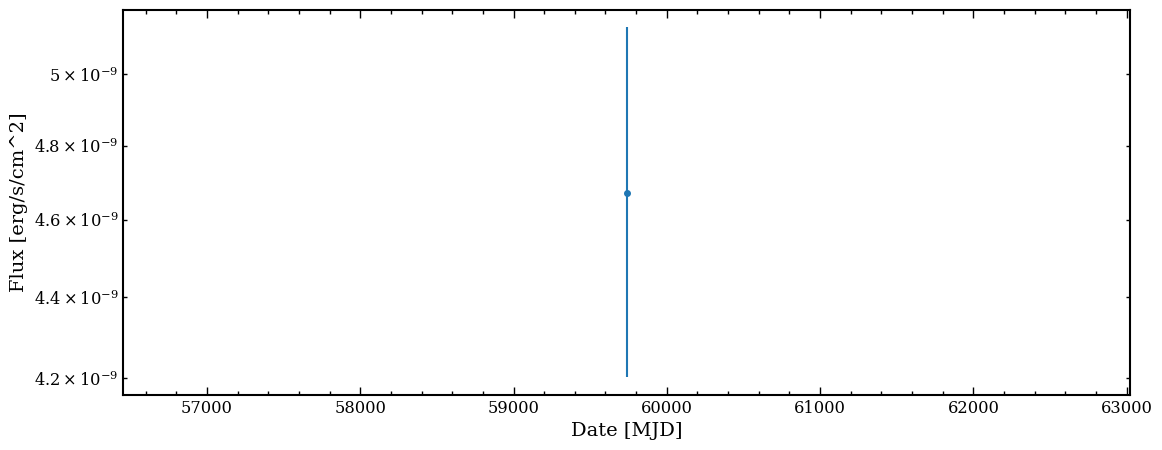

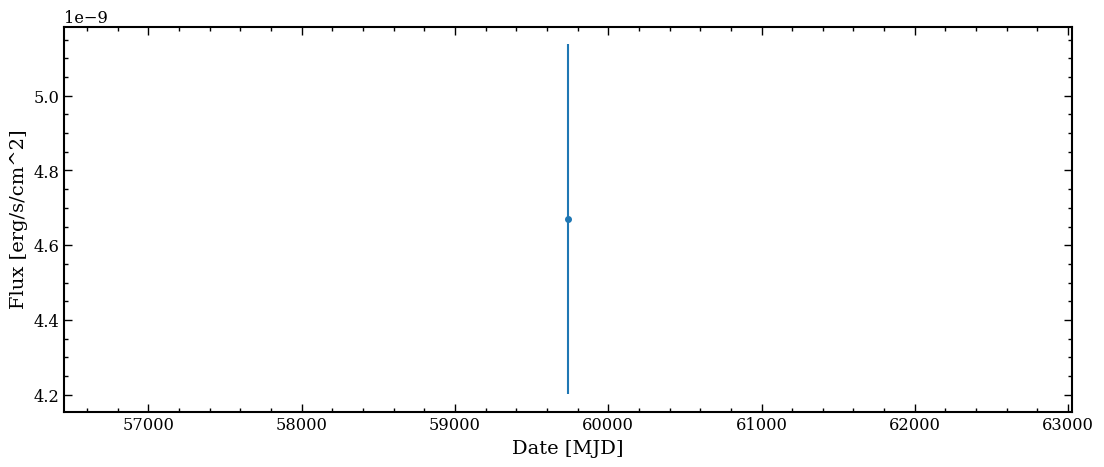

In [7]:
# WITH systematic errors
plot_xray_lightcurve(xray_df)

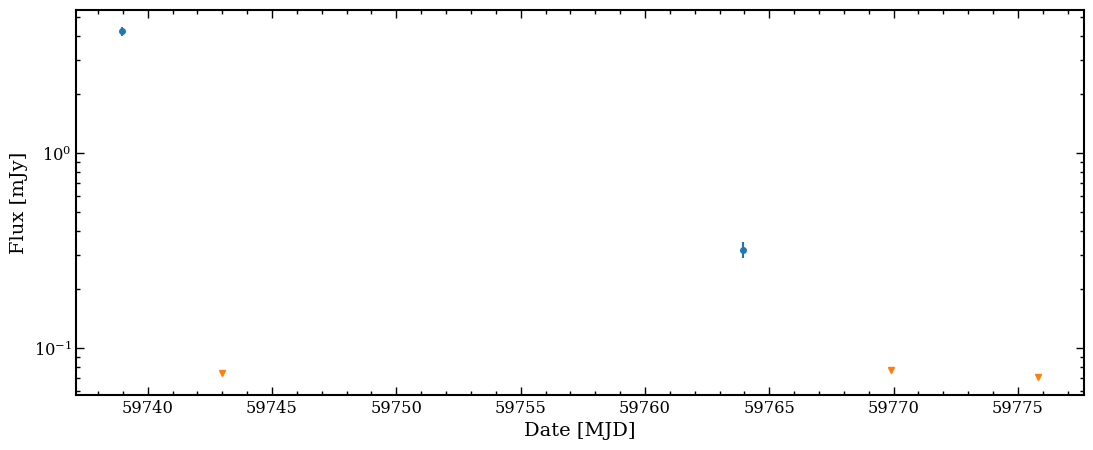

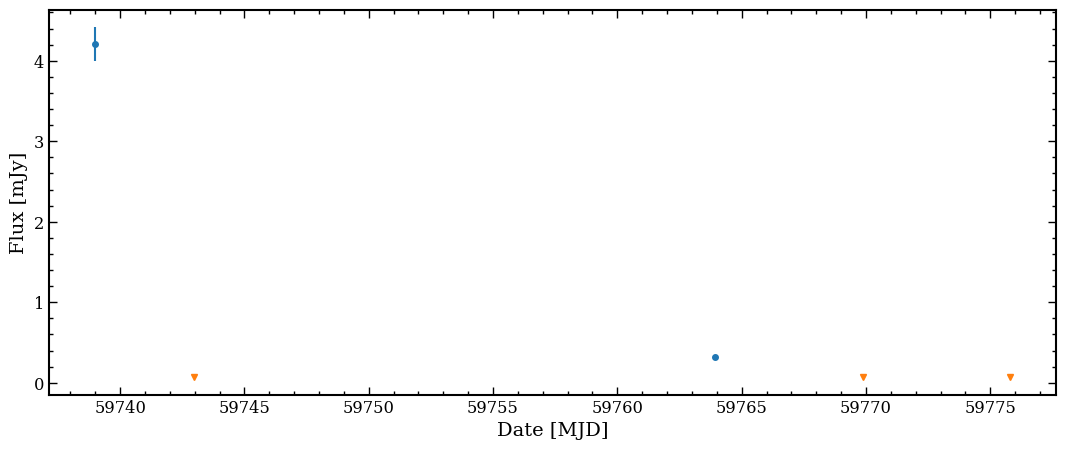

In [8]:
# WITH systematic error
plot_radio_lightcurve(radio_df)

# Pairing

In [9]:
paired_data = make_paired_Lr_Lx_df(radio_df, xray_df, source_df)

t_radio             Fr [mJy]            Fr_unc [mJy]        #xray     Mean Fx [erg/cm^2/s]          Fx_unc_l[erg/cm^2/s]          Fx_unc_u[erg/cm^2/s]          Fr_uplim_bool  Fx_uplim_bool  state          
59738.974920000     4.20600             0.21220             1         4.67000e-09                   4.67979e-10                   4.67960e-10                   False          False          HS             
Converting to luminosity using d_kpc = 6.0


In [10]:
lr_all, lx_all, all_types = get_bahramian_data()

c:\Users\justi\OneDrive\Desktop\OXFORD_PROJECT\FINAL_LR_LX_PLANE_ANALYSIS\lrlx_paper_venv\Lib\site-packages\matplotlib\cbook.py:1719: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  return math.isfinite(val)


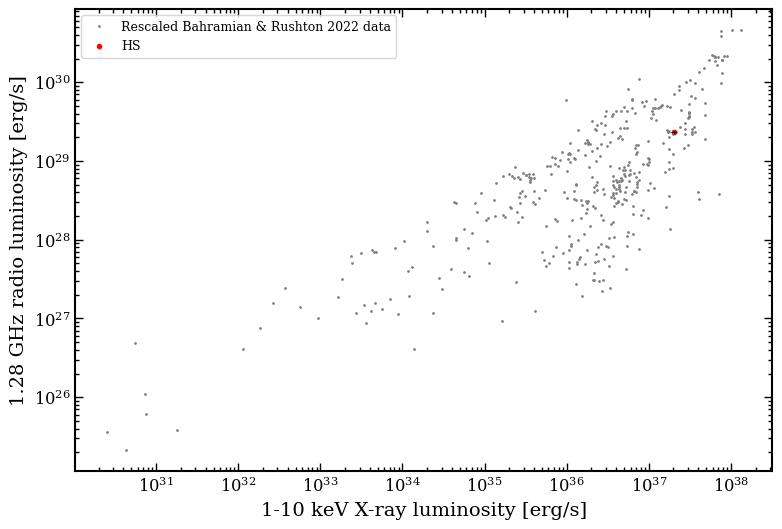

In [11]:
plot_Lr_Lx(paired_data, colourby="state", lx=lx_all, lr=lr_all)

t_radio             Fr [mJy]            Fr_unc [mJy]        #xray     Mean Fx [erg/cm^2/s]          Fx_unc_l[erg/cm^2/s]          Fx_unc_u[erg/cm^2/s]          Fr_uplim_bool  Fx_uplim_bool  state          
59738.974920000     4.20600             0.21220             1         4.67000e-09                   4.67979e-10                   4.67960e-10                   False          False          HS             
Converting to luminosity using d_kpc = 1


c:\Users\justi\OneDrive\Desktop\OXFORD_PROJECT\FINAL_LR_LX_PLANE_ANALYSIS\lrlx_paper_venv\Lib\site-packages\matplotlib\cbook.py:1719: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  return math.isfinite(val)


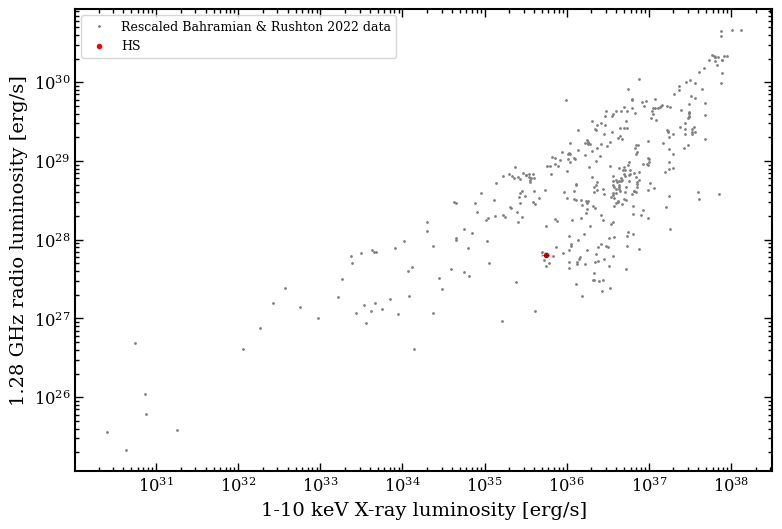

In [12]:
# Using a smaller distance
paired_data = make_paired_Lr_Lx_df(radio_df, xray_df, source_df, d_kpc = 1, save=False)
plot_Lr_Lx(paired_data, colourby="state", lx=lx_all, lr=lr_all)
